# SliCERR 

## Example notebook to run and visualize CERR segmentation in Slicer

In [1]:
import os
import numpy as np

In [2]:
import JupyterNotebooksLib as slicernb

In [3]:
octave_cli_path = '/usr/local/bin/octave-cli'
os.environ['OCTAVE_EXECUTABLE'] = octave_cli_path

In [4]:
from oct2py import octave
from oct2py import Struct
%load_ext oct2py.ipython

### Setup and module load for Octave oct2py interface

In [5]:
cerrPath = r'/Users/elocastro/Dev/CERR'

octave.eval("cerrPath = '" + cerrPath + "';")
octave.eval('addpath(cerrPath)')
octave.eval('addToPath2(cerrPath)')

Adding to path ... /Users/elocastro/Dev/CERR/CERR_Data_Extraction
Adding to path ... /Users/elocastro/Dev/CERR/CERR_core
Adding to path ... /Users/elocastro/Dev/CERR/IMRTP
Adding to path ... /Users/elocastro/Dev/CERR/Jupyter_Notebooks
Adding to path ... /Users/elocastro/Dev/CERR/ML_Dicom
Adding to path ... /Users/elocastro/Dev/CERR/Unit_Testing
Adding to path ... /Users/elocastro/Dev/CERR/extensions


In [6]:
planCFileName = r'/Users/elocastro/Dev/sliCERR/data/0617-580557_09-09-2000-11778.mat';

sessionPath = r'/Users/elocastro/Dev/slicerr'
condaEnvName = r'/Users/elocastro/Dev/slicerr/condapack_mac_CT_Heart_DeepLab'
algorithm = r'CT_Pericardium_DeepLab' 
wrapperFunction = r'/Users/elocastro/Dev/slicerr/condapack_mac_CT_Heart_DeepLab/CT_Heart_DeepLab/model_wrapper/CT_Pericardium_DeepLab/runSegPericardium.py'

octave.eval("sessionPath = '" + sessionPath + "'; condaEnvName = '" + condaEnvName + "'; algorithm = '" + algorithm + "'; wrapperFunction = '" + wrapperFunction + "';")

In [7]:
#import octave add-on packages
octave.eval('pkg load image')
octave.eval('pkg load io')
octave.eval('pkg load statistics')

In [8]:
octave.warning('off','all');

1x13 StructArray containing the fields:
    identifier
    state

In [9]:
javaPath = r'/Library/Java/JavaVirtualMachines/jdk-16.0.2.jdk/Contents/Home/lib/server'
octave.setenv('JAVA_HOME',javaPath)

## Load planC

In [10]:
octave.eval("planCFileName = '" + planCFileName + "';")

In [11]:
octave.eval('planC = loadPlanC(planCFileName);')

CERR>>  Loading 0617-580557_09-09-2000-11778.mat...
CERR>>  Loaded 0617-580557_09-09-2000-11778.mat...


In [12]:
octave.eval('indexS = planC{end};')

## Run Segmentation

In [13]:
octave.eval('init_ML_DICOM')

ans = 1


1.0

In [14]:
octave.eval('[fullSessionPath,activate_cmd,run_cmd,userOptS,outFile,scanNumV,planC] = prepDataForSeg(planC,sessionPath,algorithm,condaEnvName,{wrapperFunction},1);')

userInS =

  scalar structure containing the fields:

    strNameToLabelMap =

      scalar structure containing the fields:

        structureName = PERICARDIUM
        value = 1

    scan =

      scalar structure containing the fields:

        identifier =

          scalar structure containing the fields:

            imageType: 1x7 sq_string

        resize =

          scalar structure containing the fields:

            method: 1x4 sq_string
            size: 1x2 matrix

        crop =

          1x9 struct array containing the fields:

            method
            params
            operator


    passedScanDim = 2D
    batchSize = 1
    reference = https://w3.aapm.org/meetings/2019AM/programInfo/programAbs.php?sid=8013&aid=45641


Cropping to region of interest...
Elapsed time is 0.899559 seconds.
Elapsed time is 0.000151157 seconds.

Writing to H5 format...


In [15]:
outFileCmd = octave.pull('outFile')
print(outFileCmd)

/Users/elocastro/Dev/slicerr/session1.3.6.1.4.1.14519.5.2.1.6329.6468.52865669948174866245634885550123446.1482335.2612/segScript/CT.1.3.6.1.4.1.14519.5.2.1.6329.6468.528656699481748662456348855501240.sh


In [16]:
octave.eval('[outStrListC,labelMapS] = getAutosegStructnames(userOptS);')

In [17]:
slicer.util.launchConsoleProcess(['chmod','755',outFileCmd])

In [18]:
stdout = slicer.util.launchConsoleProcess(outFileCmd)
s=stdout.communicate()
print(s)

('Python 3.5.6 :: Anaconda, Inc.\n\n\n:   0%|          | 0/89 [00:00<?, ?it/s]\n\n:   1%|          | 1/89 [00:02<03:33,  2.43s/it]\n\n:   2%|▏         | 2/89 [00:04<03:30,  2.42s/it]\n\n:   3%|▎         | 3/89 [00:07<03:25,  2.39s/it]\n\n:   4%|▍         | 4/89 [00:09<03:21,  2.37s/it]\n\n:   6%|▌         | 5/89 [00:11<03:18,  2.37s/it]\n\n:   7%|▋         | 6/89 [00:14<03:16,  2.36s/it]\n\n:   8%|▊         | 7/89 [00:16<03:13,  2.36s/it]\n\n:   9%|▉         | 8/89 [00:18<03:10,  2.35s/it]\n\n:  10%|█         | 9/89 [00:21<03:07,  2.34s/it]\n\n:  11%|█         | 10/89 [00:23<03:04,  2.34s/it]\n\n:  12%|█▏        | 11/89 [00:25<03:02,  2.34s/it]\n\n:  13%|█▎        | 12/89 [00:28<03:00,  2.34s/it]\n\n:  15%|█▍        | 13/89 [00:30<02:57,  2.34s/it]\n\n:  16%|█▌        | 14/89 [00:32<02:55,  2.34s/it]\n\n:  17%|█▋        | 15/89 [00:35<02:53,  2.34s/it]\n\n:  18%|█▊        | 16/89 [00:37<02:50,  2.34s/it]\n\n:  19%|█▉        | 17/89 [00:39<02:48,  2.34s/it]\n\n:  20%|██        | 18/89 [

In [19]:
octave.eval('planC = processAndImportSeg(planC,scanNumV,fullSessionPath,userOptS);')

Elapsed time is 1.92978 seconds.


## Visualize PERICARDIUM structure in Slicer

### Import scans to Slicer from CERR

In [20]:
scanNumV = [1]
scanCount = len(scanNumV)

In [21]:
structList = octave.pull('outStrListC')
structCount = len(structList)

In [22]:
importStruct = True
importDose = False

octave.eval('doseNumV = [];')

In [23]:
scanNodeList = []

if scanCount != 0:
    for i in scanNumV:
        print('Importing scan' + str(i))
        octave.eval('i = ' + str(i) + ';')
        octave.eval('scanType = planC{indexS.scan}(i).scanType;')
        scanType = octave.pull('scanType')
        if importStruct:
            print('Import struct option found')
            structNodeName = scanType + '_struct'
            structureNode = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLSegmentationNode", structNodeName)
            octave.eval('assocStructCount = numel(outStrListC);')        
        octave.eval('[affineMat,scan3M_RAS,voxel_size,mask3MC, dose3MC] = getPlanCAffineMat(planC, i, 1, outStrListC, doseNumV);')
        octave.eval("qOffset = affineMat(1:3,end)';")
        octave.eval('scaleMat = eye(3); scaleMat(1,1) = 1/voxel_size(1); scaleMat(2,2) = 1/voxel_size(2); scaleMat(3,3) = 1/voxel_size(3);ijkMat = scaleMat * affineMat(1:3,1:3);')
        affineMat, ijkMat, qOffset, scan3M_RAS, voxel_size = octave.pull(['affineMat','ijkMat','qOffset','scan3M_RAS','voxel_size'])
        if scanType == '':
            scanType = 'planC_scan_' + str(i)
        slicer.mrmlScene.AddNewNodeByClass("vtkMRMLScalarVolumeNode", scanType)
        scanNodeList.append(slicer.util.getNode(scanType))
        scanNodeList[-1].SetOrigin(qOffset[0])
        scanNodeList[-1].SetSpacing(voxel_size[0])
        scanNodeList[-1].SetIJKToRASDirections(ijkMat)
        slicer.util.updateVolumeFromArray(scanNodeList[-1], np.swapaxes(scan3M_RAS,2,0))
        slicer.util.setSliceViewerLayers(background=scanNodeList[-1])
        if importStruct:
            structureNode.SetReferenceImageGeometryParameterFromVolumeNode(scanNodeList[-1])
            for j in range(int(structCount)):
                octave.eval('j = '+ str(j+1) + ';')
                octave.eval('structName = outStrListC{j}; mask3M = mask3MC{j};')
                structName, mask3M = octave.pull(['structName','mask3M'])
                print('Importing structure #' + str(j+1) + ', ' + structName)
                slicer.util.addVolumeFromArray(np.swapaxes(mask3M,2,0)*(j+1), ijkToRAS=affineMat, name=structName, nodeClassName="vtkMRMLLabelMapVolumeNode")
                lmap = slicer.util.getNode(structName)
                slicer.modules.segmentations.logic().ImportLabelmapToSegmentationNode(lmap, structureNode)
                slicer.mrmlScene.RemoveNode(lmap)
                segId = structureNode.GetSegmentation().GetNthSegment(j)
                segId.SetName(structName)

Importing scan1
Import struct option found
Creating raster-scan representation of pericardium contour.
Importing structure #1, PERICARDIUM


### Show Slicer window in notebook

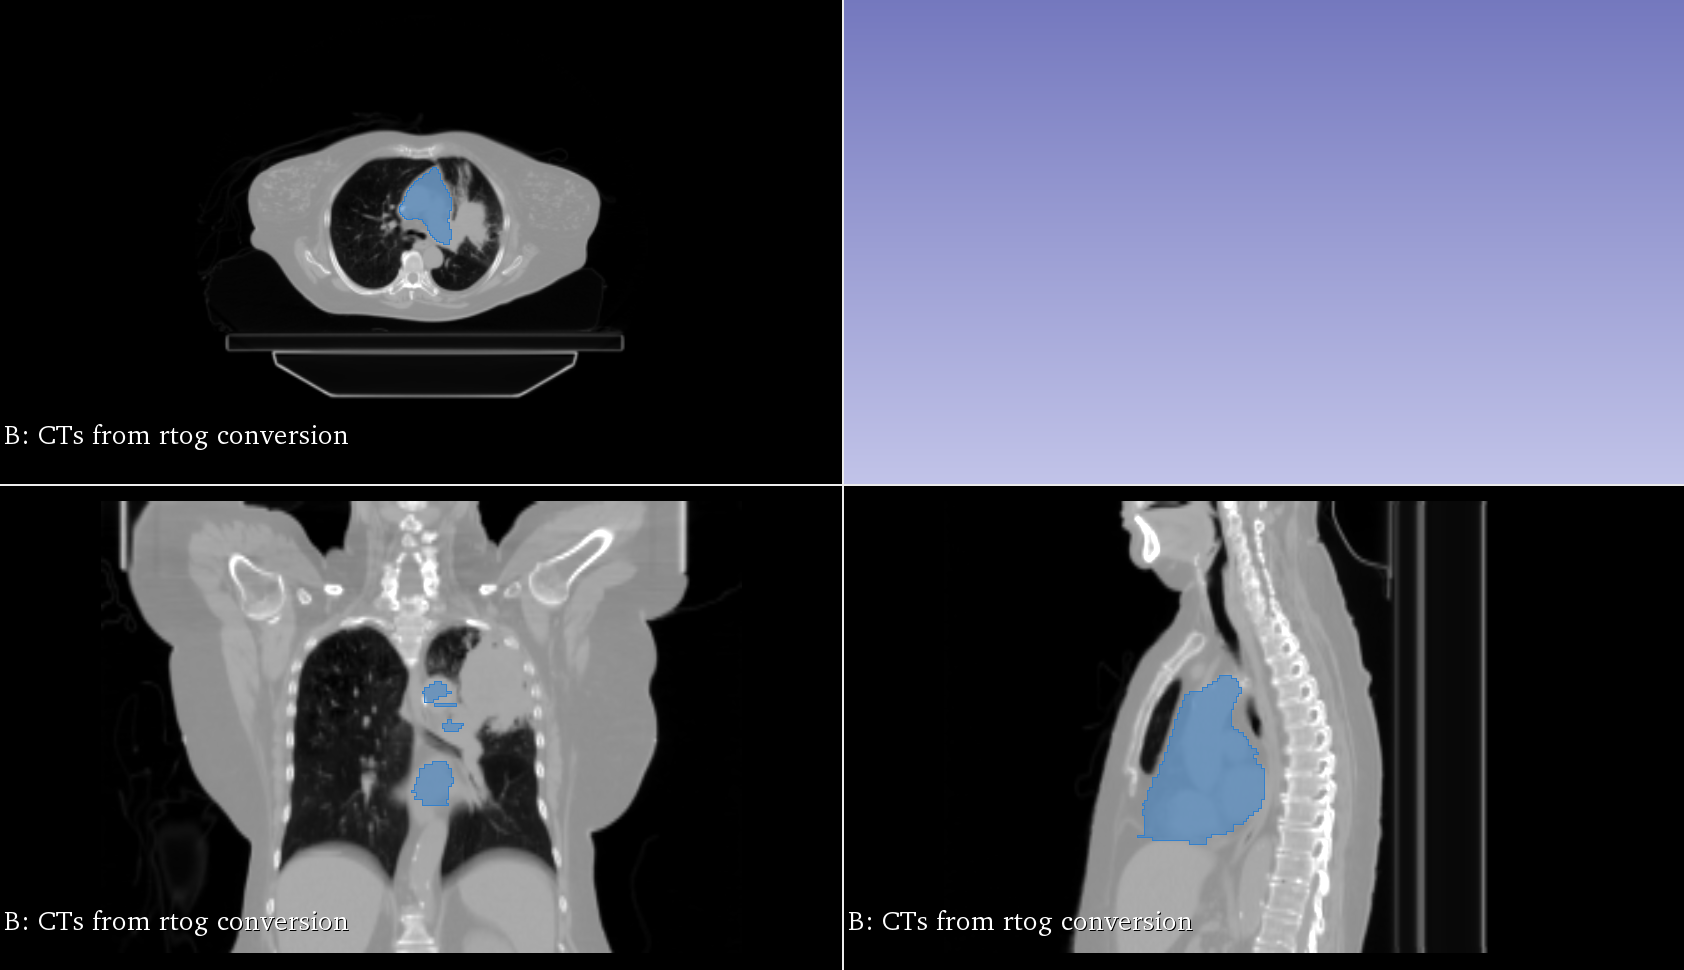

In [24]:
slicernb.ViewDisplay()